Loading Packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.simplefilter("ignore", category=FutureWarning)
import spacy


Data Loading and Preprocessing

In [2]:
#Loading Dataset
data = pd.read_csv("C:/Users/Sonali/Documents/Flipkart data1.csv" , encoding='ISO-8859-1')
data.columns

Index(['Unnamed: 0', '_id', 'pid', 'actual_price', 'average_rating',
       'Product brand', 'Product category', 'crawled_at', 'Discount',
       'Product description', 'images', 'out_of_stock', 'product_details',
       'seller', 'selling_price', 'sub_category', 'title', 'url'],
      dtype='object')

In [3]:
#Loading only selective columns
data = data[['_id','pid', 'average_rating', 'Product category', 'Product brand', 'title',  'Product description', 'product_details','images']]
data.head(5)

,_id,pid,average_rating,Product category,Product brand,title,Product description,product_details,images
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,TKPFCZ9EA7H5FYZH,3.9,Clothing and Accessories,York,Solid Men Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",['https://rukminim1.flixcart.com/image/128/128...
1,893e6980-f2a0-531f-b056-34dd63fe912c,TKPFCZ9EJZV2UVRZ,3.9,Clothing and Accessories,York,Solid Men Blue Track Pants,Yorker trackpants made from 100% rich combed c...,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",['https://rukminim1.flixcart.com/image/128/128...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,TKPFCZ9EHFCY5Z4Y,3.9,Clothing and Accessories,York,Solid Men Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",['https://rukminim1.flixcart.com/image/128/128...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,TKPFCZ9ESZZ7YWEF,3.9,Clothing and Accessories,York,Solid Men Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",['https://rukminim1.flixcart.com/image/128/128...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,TKPFCZ9EVXKBSUD7,3.9,Clothing and Accessories,York,"Solid Men Brown, Grey Track Pants",Yorker trackpants made from 100% rich combed c...,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",['https://rukminim1.flixcart.com/image/128/128...


Basic Operations

In [4]:
data.shape


(5002, 9)

In [5]:
data.describe()

,average_rating
count,4450.000000
mean,3.657213
std,0.700370
min,1.000000
25%,3.400000
50%,3.800000
75%,4.100000
max,5.000000


In [6]:
data.isnull().sum()


_id                       0
pid                       0
average_rating          552
Product category          0
Product brand           615
title                     0
Product description    1620
product_details           0
images                    0
dtype: int64

In [7]:
# Fill missing values in 'average_rating' with a default value (e.g., 0)
data['average_rating'].fillna(0, inplace=True)
# Fill missing values in 'Product Brand' with a default value (e.g., 'Unknown')
data['Product brand'].fillna('Unknown', inplace=True)
# Fill missing values in 'Product Description' with an empty string
data['Product description'].fillna('', inplace=True)




In [8]:
data.isnull().sum()


_id                    0
pid                    0
average_rating         0
Product category       0
Product brand          0
title                  0
Product description    0
product_details        0
images                 0
dtype: int64

In [9]:
data.duplicated().sum()


0

In [10]:
# Make columns shorter
# Define the mapping of current column names to shorter names
column_name_mapping = {
    '_id': 'ID',
    'pid': 'ProdID',
    'average_rating': 'Rating',
    'Product category': 'Category',
    'Product brand': 'Brand',
    'title': 'Name',
    'images': 'ImageURL',
    'Product description': 'Description',
    'product_details':'Details'
}
# Rename the columns using the mapping
data.rename(columns=column_name_mapping, inplace=True)

In [11]:
data.head()

,ID,ProdID,Rating,Category,Brand,Name,Description,Details,ImageURL
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,TKPFCZ9EA7H5FYZH,3.9,Clothing and Accessories,York,Solid Men Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",['https://rukminim1.flixcart.com/image/128/128...
1,893e6980-f2a0-531f-b056-34dd63fe912c,TKPFCZ9EJZV2UVRZ,3.9,Clothing and Accessories,York,Solid Men Blue Track Pants,Yorker trackpants made from 100% rich combed c...,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",['https://rukminim1.flixcart.com/image/128/128...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,TKPFCZ9EHFCY5Z4Y,3.9,Clothing and Accessories,York,Solid Men Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",['https://rukminim1.flixcart.com/image/128/128...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,TKPFCZ9ESZZ7YWEF,3.9,Clothing and Accessories,York,Solid Men Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",['https://rukminim1.flixcart.com/image/128/128...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,TKPFCZ9EVXKBSUD7,3.9,Clothing and Accessories,York,"Solid Men Brown, Grey Track Pants",Yorker trackpants made from 100% rich combed c...,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",['https://rukminim1.flixcart.com/image/128/128...


In [12]:
data['ID'] = data['ID'].str.extract(r'(\d+)').astype(float)
data['ProdID'] = data['ProdID'].str.extract(r'(\d+)').astype(float)

EDA (Exploratory Data Analysis)

In [13]:
# Basic statistics
num_users = data['ID'].nunique()
num_items = data['ProdID'].nunique()
num_ratings = data['Rating'].nunique()
print("Number of unique users:" ,num_users)
print("Number of unique items: ",num_items)
print("Number of unique ratings: ",num_ratings)

Number of unique users: 1732
Number of unique items:  154
Number of unique ratings:  36


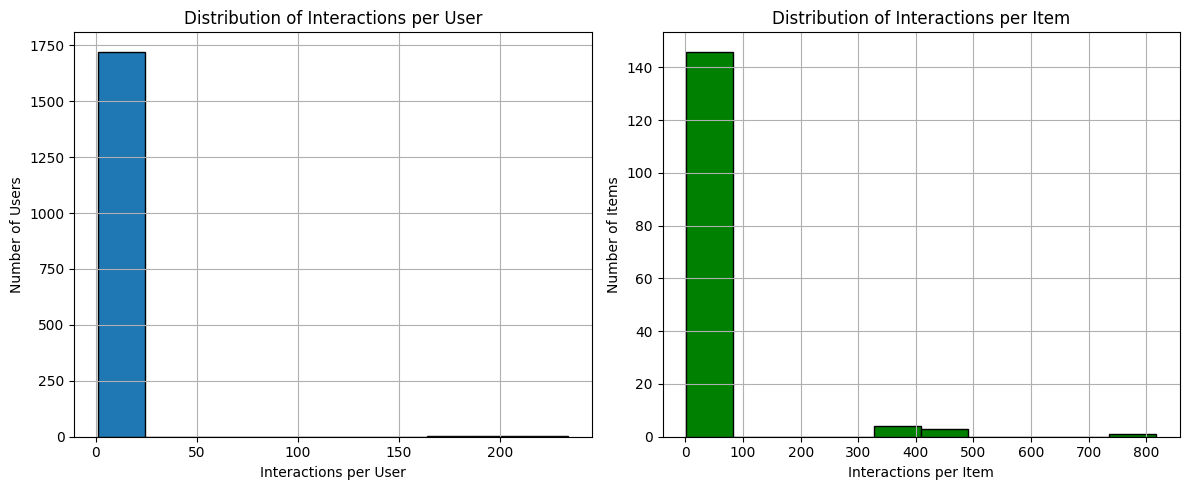

In [14]:
# Distribution of interactions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
data['ProdID'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most Popular items')

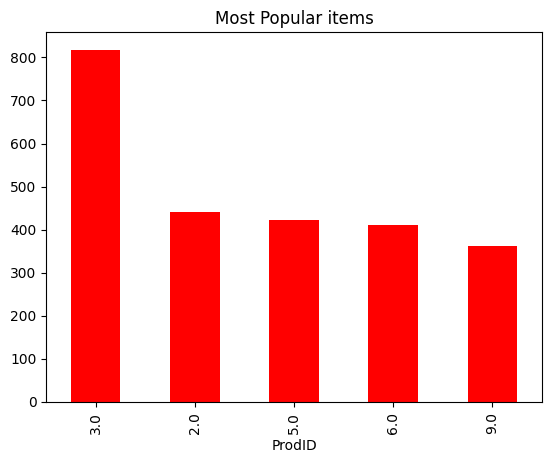

In [15]:
# Most popular items
popular_items = data['ProdID'].value_counts().head(5)
popular_items.plot(kind='bar',color='red')
plt.title("Most Popular items")

<Axes: xlabel='Rating'>

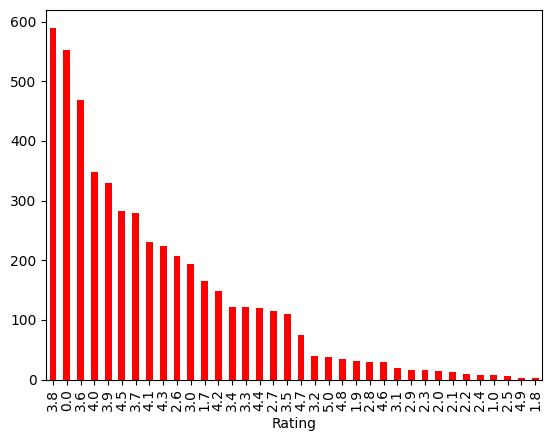

In [16]:
# Most rated counts
data['Rating'].value_counts().plot(kind='bar',color='red')

Data Cleaning and Tags Creations

In [17]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def clean_and_extract_tags(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

columns_to_extract_tags_from = ['Category', 'Brand', 'Description']

for column in columns_to_extract_tags_from:
    data[column] = data[column].apply(clean_and_extract_tags)

In [18]:
# Concatenate the cleaned tags from all relevant columns
data['Tags'] = data[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)

In [19]:
data.head()

,ID,ProdID,Rating,Category,Brand,Name,Description,Details,ImageURL,Tags
0,8.0,9.0,3.9,"clothing, accessories",york,Solid Men Multicolor Track Pants,"yorker, trackpants, 100, rich, combed, cotton,...","[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",['https://rukminim1.flixcart.com/image/128/128...,"clothing, accessories, york, yorker, trackpant..."
1,893.0,9.0,3.9,"clothing, accessories",york,Solid Men Blue Track Pants,"yorker, trackpants, 100, rich, combed, cotton,...","[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",['https://rukminim1.flixcart.com/image/128/128...,"clothing, accessories, york, yorker, trackpant..."
2,4.0,9.0,3.9,"clothing, accessories",york,Solid Men Multicolor Track Pants,"yorker, trackpants, 100, rich, combed, cotton,...","[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",['https://rukminim1.flixcart.com/image/128/128...,"clothing, accessories, york, yorker, trackpant..."
3,3.0,9.0,3.9,"clothing, accessories",york,Solid Men Multicolor Track Pants,"yorker, trackpants, 100, rich, combed, cotton,...","[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",['https://rukminim1.flixcart.com/image/128/128...,"clothing, accessories, york, yorker, trackpant..."
4,750.0,9.0,3.9,"clothing, accessories",york,"Solid Men Brown, Grey Track Pants","yorker, trackpants, 100, rich, combed, cotton,...","[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",['https://rukminim1.flixcart.com/image/128/128...,"clothing, accessories, york, yorker, trackpant..."


Rating Base Recommendations System

In [20]:
data1=data[['Name','Rating','Brand','Description','ImageURL']]
data1

,Name,Rating,Brand,Description,ImageURL
0,Solid Men Multicolor Track Pants,3.9,york,"yorker, trackpants, 100, rich, combed, cotton,...",['https://rukminim1.flixcart.com/image/128/128...
1,Solid Men Blue Track Pants,3.9,york,"yorker, trackpants, 100, rich, combed, cotton,...",['https://rukminim1.flixcart.com/image/128/128...
2,Solid Men Multicolor Track Pants,3.9,york,"yorker, trackpants, 100, rich, combed, cotton,...",['https://rukminim1.flixcart.com/image/128/128...
3,Solid Men Multicolor Track Pants,3.9,york,"yorker, trackpants, 100, rich, combed, cotton,...",['https://rukminim1.flixcart.com/image/128/128...
4,"Solid Men Brown, Grey Track Pants",3.9,york,"yorker, trackpants, 100, rich, combed, cotton,...",['https://rukminim1.flixcart.com/image/128/128...
...,...,...,...,...,...
4997,Solid Men Polo Neck Multicolor T-Shirt (Pack ...,3.6,shoef,"experience, amazing, comfort, shoefly, polo, t...",['https://rukminim1.flixcart.com/image/128/128...
4998,Solid Men Polo Neck Multicolor T-Shirt (Pack ...,3.6,shoef,"experience, amazing, comfort, shoefly, polo, t...",['https://rukminim1.flixcart.com/image/128/128...
4999,Solid Men Polo Neck Multicolor T-Shirt (Pack ...,3.6,shoef,"latest, men, t, shirts, sleeve, shoefly, manda...",['https://rukminim1.flixcart.com/image/128/128...
5000,Solid Men Polo Neck Multicolor T-Shirt (Pack ...,3.6,shoef,"experience, amazing, comfort, shoefly, polo, t...",['https://rukminim1.flixcart.com/image/128/128...


In [21]:
top_rated_items = data1.sort_values(by='Rating', ascending=False)

rating_base_recommendation = top_rated_items.head(10)

In [22]:
rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)

In [23]:
print("Rating Base Recommendation System: (Trending Products)")
rating_base_recommendation[['Name','Rating','Brand','Description','ImageURL']] = rating_base_recommendation[['Name','Rating','Brand','Description','ImageURL']]
rating_base_recommendation

Rating Base Recommendation System: (Trending Products)


,Name,Rating,Brand,Description,ImageURL
2995,Men Solid Multicolor Top & Pyjama Set,5,"inter, creati","soft, fabric",['https://rukminim1.flixcart.com/image/128/128...
2882,Tripin Brass Cufflink (Pink),5,unknown,"tripin, square, cufflink, imported, pink, ston...",['https://rukminim1.flixcart.com/image/128/128...
3370,Printed Men Round Neck Multicolor T-Shirt (Pa...,5,ref,,['https://rukminim1.flixcart.com/image/128/128...
3359,Printed Men Round Neck Yellow T-Shirt,5,ref,,['https://rukminim1.flixcart.com/image/128/128...
3330,AXMANN Round Neck Self Design Men Pullover,5,unknown,"axmann, self, designed, pullover",['https://rukminim1.flixcart.com/image/128/128...
3296,Solid Men Round Neck Red T-Shirt,5,axma,"axmann, basic, v, neck, t, shirt, axmann, prem...",['https://rukminim1.flixcart.com/image/128/128...
3229,Full Sleeve Striped Men Sweatshirt,5,axma,,['https://rukminim1.flixcart.com/image/128/128...
3211,Solid Men Polo Neck Multicolor T-Shirt,5,axma,,['https://rukminim1.flixcart.com/image/128/128...
3119,Solid Men Polo Neck Grey T-Shirt,5,axma,,['https://rukminim1.flixcart.com/image/128/128...
3028,Striped Men Polo Neck Green T-Shirt,5,axma,"axmann, green, striped, casual, wear, men, sum...",['https://rukminim1.flixcart.com/image/128/128...


Hence,Top 10 Products are recommended successfully based on Rating

Collaborative Filtering (User Item Similarity) Recommendation System

In [24]:
user_item_matrix = data.pivot_table(index='ID', columns='ProdID', values='Rating',aggfunc='mean').fillna(0).astype(int)


In [25]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
user_similarity = cosine_similarity(user_item_matrix)


In [26]:
target_user_id = 4
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [27]:
user_similarities = user_similarity[target_user_index]

similar_user_indices = user_similarities.argsort()[::-1][1:]

In [28]:
recommend_items = []

for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)
    
    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recommended_items_details = data[data['ProdID'].isin(recommend_items)][['Name','Description','Brand','ImageURL','Rating']]

In [29]:
recommended_items_details.head(10)


,Name,Description,Brand,ImageURL,Rating
42,nu-Lite Satin Tie & Cufflink (Black),,unknown,['https://rukminim1.flixcart.com/image/128/128...,2.7
57,nu-Lite Satin Tie & Cufflink (Multicolor),"nextedgeretails, professional, tie, manufactur...",unknown,['https://rukminim1.flixcart.com/image/128/128...,2.7
133,nu-Lite Satin Tie Pin Set (Pink),,unknown,['https://rukminim1.flixcart.com/image/128/128...,2.7
150,nu-Lite Satin Tie & Cufflink (Multicolor),"wearing, elegant, man, tie, effective, way, lo...",unknown,['https://rukminim1.flixcart.com/image/128/128...,2.7
457,SayItLoud Men Vest,"stay, relaxed, rigorous, training, sessions, w...",unknown,['https://rukminim1.flixcart.com/image/128/128...,2.9
477,SayItLoud Men Vest,"world, boring, little, twist, twist, added, fa...",unknown,['https://rukminim1.flixcart.com/image/128/128...,3.8
786,Solid Men Collared Neck Reversible Red T-Shirt,,fairdea,['https://rukminim1.flixcart.com/image/128/128...,3.3
811,Men Kurta and Pyjama Set Pure Cotton,,"jagdish, garmen",['https://rukminim1.flixcart.com/image/128/128...,0.0
816,Men Kurta and Pyjama Set Pure Cotton,,"jagdish, garmen",['https://rukminim1.flixcart.com/image/128/128...,0.0
817,Men Kurta and Pyjama Set Pure Cotton,,"jagdish, garmen",['https://rukminim1.flixcart.com/image/128/128...,0.0


Function That Recommend Items

In [30]:
def collaborative_filtering_recommendations(data, target_user_id, top_n=10):

    user_item_matrix = data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = []

    for user_index in similar_users_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

 
    recommended_items_details = data[data['ProdID'].isin(recommended_items)][['Name','Description','Brand','ImageURL','Rating']]

    return recommended_items_details.head(10)

Example Usage:

In [31]:
target_user_id = 10
top_n = 10
collaborative_filtering_rec = collaborative_filtering_recommendations(data, target_user_id)
print("Top", top_n,"recommendations for User :",  target_user_id)
collaborative_filtering_rec

Top 10 recommendations for User : 10


,Name,Description,Brand,ImageURL,Rating
20,Solid Men Dark Blue Track Pants,"yorker, trackpants, 100, rich, combed, cotton,...",york,['https://rukminim1.flixcart.com/image/128/128...,4.5
31,Solid Men Blue Track Pants,,york,['https://rukminim1.flixcart.com/image/128/128...,3.3
38,nu-Lite Satin Tie & Cufflink (Grey),"nextedgeretails, professional, tie, manufactur...",unknown,['https://rukminim1.flixcart.com/image/128/128...,4.3
43,nu-Lite Satin Tie & Cufflink (Blue),"professional, tie, manufacturer, focus, ties, ...",unknown,['https://rukminim1.flixcart.com/image/128/128...,4.5
45,nu-Lite Satin Tie & Cufflink (Blue),"wearing, elegant, man, tie, effective, way, lo...",unknown,['https://rukminim1.flixcart.com/image/128/128...,4.3
46,nu-Lite Satin Tie & Cufflink (Red),"good, quality, product",unknown,['https://rukminim1.flixcart.com/image/128/128...,2.7
52,nu-Lite Satin Tie & Cufflink (Red),,unknown,['https://rukminim1.flixcart.com/image/128/128...,4.3
55,nu-Lite Satin Tie & Cufflink (Black),"provides, nu, lite, men, necktie, pocket, squa...",unknown,['https://rukminim1.flixcart.com/image/128/128...,2.7
57,nu-Lite Satin Tie & Cufflink (Multicolor),"nextedgeretails, professional, tie, manufactur...",unknown,['https://rukminim1.flixcart.com/image/128/128...,2.7
66,nu-Lite Satin Tie & Cufflink (Pink),,unknown,['https://rukminim1.flixcart.com/image/128/128...,4.3


In [32]:
target_user_id = 15
top_n = 10
collaborative_filtering_rec = collaborative_filtering_recommendations(data, target_user_id)
print("Top", top_n,"recommendations for User :",  target_user_id)
collaborative_filtering_rec

Top 10 recommendations for User : 15


,Name,Description,Brand,ImageURL,Rating
9,Solid Men Grey Track Pants,"yorker, trackpants, 100, rich, combed, cotton,...",york,['https://rukminim1.flixcart.com/image/128/128...,3.7
13,Self Design Men Multicolor Track Pants,,york,['https://rukminim1.flixcart.com/image/128/128...,3.3
14,Self Design Men Multicolor Track Pants,,york,['https://rukminim1.flixcart.com/image/128/128...,3.3
16,Self Design Men Multicolor Track Pants,,york,['https://rukminim1.flixcart.com/image/128/128...,3.3
17,Self Design Men Multicolor Track Pants,,york,['https://rukminim1.flixcart.com/image/128/128...,3.3
18,Self Design Men Multicolor Track Pants,,york,['https://rukminim1.flixcart.com/image/128/128...,3.3
46,nu-Lite Satin Tie & Cufflink (Red),"good, quality, product",unknown,['https://rukminim1.flixcart.com/image/128/128...,2.7
47,nu-Lite Satin Tie & Cufflink (Red),,unknown,['https://rukminim1.flixcart.com/image/128/128...,2.7
52,nu-Lite Satin Tie & Cufflink (Red),,unknown,['https://rukminim1.flixcart.com/image/128/128...,4.3
57,nu-Lite Satin Tie & Cufflink (Multicolor),"nextedgeretails, professional, tie, manufactur...",unknown,['https://rukminim1.flixcart.com/image/128/128...,2.7


Hence , Top 10 Products are recommended successfully using collaborative filtering approach